In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ATP.csv',dtype=str)

### Preprocessing

In [3]:
data['tourney_year'] = data.tourney_date.astype(str).str[:4]

data = data[data['tourney_year'].between('1968','2016')]

data['winner_name'] = data['winner_name'].dropna().astype(str)
data['loser_name'] = data['loser_name'].dropna().astype(str)
data['winner_rank'] = data['winner_rank'].fillna(0).astype(int)
data['loser_rank'] = data['loser_rank'].fillna(0).astype(float)
data['winner_age'] = data['winner_age'].dropna().astype(float)
data['loser_age'] = data['loser_age'].dropna().astype(float)
data['winner_ht'] = data['winner_ht'].dropna().astype(int)
data['loser_ht'] = data['loser_ht'].dropna().astype(int)
data['w_svpt'] = data['w_svpt'].fillna(0).astype(int)
data['l_svpt'] = data['l_svpt'].fillna(0).astype(int)
data['w_ace'] = data['w_ace'].fillna(0).astype(int)
data['l_ace'] = data['l_ace'].fillna(0).astype(int)
data['w_df'] = data['w_df'].fillna(0).astype(int)
data['l_df'] = data['l_df'].fillna(0).astype(int)
data['w_bpSaved'] = data['w_bpSaved'].fillna(0).astype(int)
data['l_bpSaved'] = data['l_bpSaved'].fillna(0).astype(int)

### Direct interaction based simplicial graph
There exists an undirected edge between two players iff they have played each other at least once

In [4]:
data['tourney_date'] = data['tourney_date'].fillna(0).astype(int);

In [22]:
atp = np.array([data['tourney_date'],data['winner_name'],data['loser_name']]).T

In [23]:
G = nx.Graph()

In [24]:
for match in atp:
    if not G.has_node(match[1]):
        G.add_node(match[1])
        G.node[match[1]]['id'] = match[1]
    if not G.has_node(match[2]):
        G.add_node(match[2])
        G.node[match[2]]['id'] = match[2]
    if not G.has_edge(match[1],match[2]):
        G.add_edge(match[1],match[2])

In [98]:
nx.write_graphml(G,'test.graphml')

In [99]:
degrees = [val for (node, val) in G.degree()]

In [101]:
degrees = np.array(degrees,dtype=int)
np.savetxt("Simplicial_deg.txt",degrees,header='Simplicial')

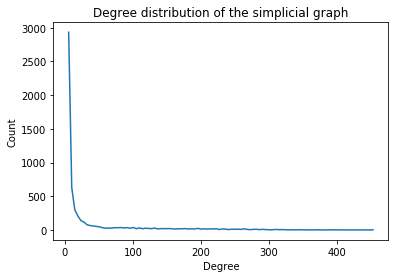

In [94]:
count,bin_e = np.histogram(degrees,bins=100)

plt.plot(bin_e[1:],count)
plt.title("Degree distribution of the simplicial graph")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.savefig("Simplicial_degree_dist.png",dpi=300)

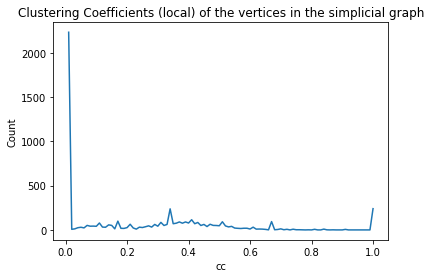

In [95]:
cc = [x for x in nx.algorithms.cluster.clustering(G).values()]

count,bin_e = np.histogram(cc,bins=100)

plt.plot(bin_e[1:],count)
plt.title("Clustering Coefficients (local) of the vertices in the simplicial graph")
plt.xlabel("cc")
plt.ylabel("Count")
plt.savefig("Simplicial_cc.png",dpi=300)

### Direct interaction based heterogenous graph: No triangles
Herein nodes are of two sorts:
1. matches
2. players

No two players are adjacent to one another and no two matches are adjacent to one another. Two players connect to a match if they played in it. 

Bipartite sructure is reminiscent of:<br>
Guillaume, Jean-Loup, and Matthieu Latapy. _"Bipartite graphs as models of complex networks."_ Physica A: Statistical Mechanics and its Applications 371.2 (2006): 795-813.

In [102]:
G1 = nx.Graph()

In [103]:
no_tri = np.array([data['tourney_date'],data['winner_name'],data['loser_name']]).T

In [104]:
i = 0
for match in no_tri:
    if match[1] == match[2]:
        continue
    G1.add_node(match[1])
    G1.node[match[1]]['id'] = match[1]
    G1.add_node(match[2])
    G1.node[match[2]]['id'] = match[2]
    G1.add_node(str(i))
    G1.node[str(i)]['id'] = i
    G1.add_edge(match[1],i)
    G1.add_edge(match[2],i)
    i = i + 1

In [105]:
degrees = [val for (node, val) in G1.degree()]

In [106]:
degrees = np.array(degrees,dtype=int)
np.savetxt("No_Tri_deg.txt",degrees,header='No_tri')

In [82]:
count,bin_e = np.histogram(degrees,bins=10)

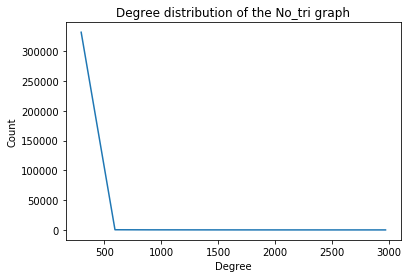

In [86]:
plt.plot(bin_e[1:],count)
plt.title("Degree distribution of the No_tri graph")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.savefig("No_Tri_degree_dist.png",dpi=300)

#plt.figure()

In [87]:
cc = [x for x in nx.algorithms.cluster.clustering(G1).values()]

In [88]:
count,bin_e = np.histogram(cc,bins=50)

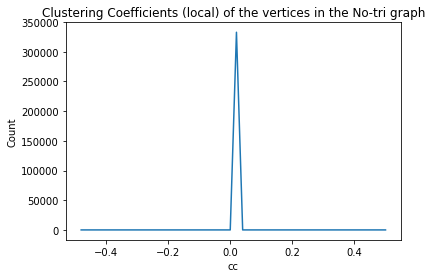

In [90]:
plt.plot(bin_e[1:],count)
plt.title("Clustering Coefficients (local) of the vertices in the No-tri graph")
plt.xlabel("cc")
plt.ylabel("Count")
plt.savefig("No_Tri_cc.png",dpi=300)

### Explanation
The high frequency near cc(v) = 0 $\forall$ v $\in$ V(G) is provably true for all of the vertices in the graph. This is simply because the construction yields a bipartite graph

### Heterogenous graph with triangles and embedded preferential attachment
Herein nodes are of two sorts:
1. matches
2. players

All players that play with one another are adjacent to one another. No two matches are adjacent to one another.

This emphasis on triangles with an inherent preferential attachment model brings to mind:<br>
Dorogovtsev, Sergey N., and Jose FF Mendes. _"Evolution of networks."_ Advances in physics 51.4 (2002): 1079-1187.

In [116]:
tri = np.array([data['tourney_date'],data['winner_name'],data['loser_name']]).T

In [117]:
G2 = nx.Graph()

In [118]:
i = 0
for match in tri:
    if match[1] == match[2]:
        continue
    G2.add_node(match[1])
    G2.node[match[1]]['id'] = match[1]
    G2.add_node(match[2])
    G2.node[match[2]]['id'] = match[2]
    G2.add_node(str(i))
    G2.node[str(i)]['id'] = i
    G2.add_edge(match[1],i)
    G2.add_edge(match[2],i)
    G2.add_edge(match[2],match[1])
    i = i + 1

In [119]:
degrees = [val for (node, val) in G2.degree()]

In [120]:
degrees = np.array(degrees,dtype=int)
np.savetxt("Tri_deg.txt",degrees)

In [121]:
count,bin_e = np.histogram(degrees,bins=10)

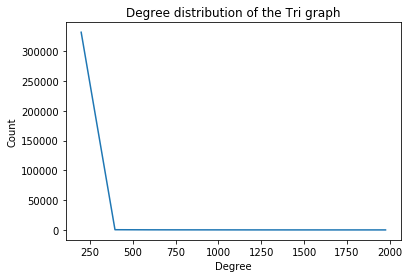

In [122]:
plt.plot(bin_e[1:],count)
plt.title("Degree distribution of the Tri graph")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.savefig("Tri_degree_dist.png",dpi=300)

In [123]:
cc = [x for x in nx.algorithms.cluster.clustering(G2).values()]

In [124]:
count,bin_e = np.histogram(cc,bins=50)

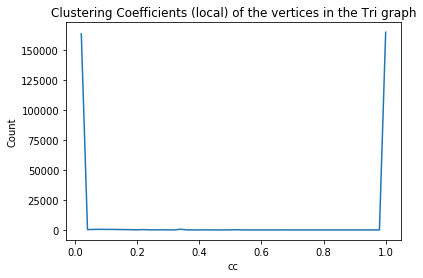

In [125]:
plt.plot(bin_e[1:],count)
plt.title("Clustering Coefficients (local) of the vertices in the Tri graph")
plt.xlabel("cc")
plt.ylabel("Count")
plt.savefig("Tri_cc.png",dpi=300)

### Explanation
Here the set of vertices representing matches constitute a indepemdent set but the same is not true for the set of vertices representing players as each player is a part of at least one triangle and the number of such triagles equals the number of distinct oponents played by the player.

In [126]:
nx.algorithms.average_clustering(G)

0.23663344480944973

In [127]:
nx.algorithms.average_clustering(G1)

0.0

In [128]:
nx.algorithms.average_clustering(G2)

0.49772098663667136

### Evolution over time
The basic model will now be studied using the time stamps to see if the claims made in teh following papers hold:<br><br>
Leskovec, Jure, Jon Kleinberg, and Christos Faloutsos. _"Graph evolution: Densification and shrinking diameters."_ ACM Transactions on Knowledge Discovery from Data (TKDD) 1.1 (2007): 2.

Leskovec, Jure, Jon Kleinberg, and Christos Faloutsos. _"Graphs over time: densification laws, shrinking diameters and possible explanations."_ Proceedings of the eleventh ACM SIGKDD international conference on Knowledge discovery in data mining. ACM, 2005.

In [5]:
def effective_diam(G):
    ecc = []
    for c in nx.connected_components(G):
        #print("in here")
        vals = [x for x in nx.eccentricity(G.subgraph(c)).values()]
        for v in vals:
            ecc.append(v)
    # Linear interpolation as prescribed by authors of the work referenced above
    return np.percentile(ecc,q=0.9,interpolation='linear')

In [6]:
def avg_deg(G):
    return 2*G.number_of_edges()/G.number_of_nodes()

In [18]:
G = nx.Graph()

In [19]:
atp = np.array([data['tourney_date'],data['winner_name'],data['loser_name']]).T

The requirement that the graph be connected is too strict

In [12]:
int(np.random.randint(1,10,1)) == 10

False

### Comprehensive evolution study
The computation herein is highly repetitive and the same would not be an issue had it not been the case that the computations of effective diameters and Clustering coefficients begin to get rather time intensive once the number of nodes and edges climbs above 2000 

In [ ]:
deg = []
eff_diam = []
cc = []
av_path = []
i = 0
for match in atp:
    i = i + 1
    G.add_node(match[1])
    G.add_node(match[2])
    G.add_edge(match[1],match[2])
    if i > 10000:
        break
    if int(np.random.randint(1,20,1)) == 7:  
        try:
            deg.append(avg_deg(G))
            cc.append(nx.algorithms.average_clustering(G))
            eff_diam.append(effective_diam(G))
            for c in nx.connected_components(G):
                av_path.append(nx.average_shortest_path_length(G.subgraph(c)))
            print(i)
        except:
            print("Exception!")
            continue

### A much smaller evaluation

In [9]:
deg = []
eff_diam = []
cc = []
av_path = []
i = 0
for match in atp:
    i = i + 1
    G.add_node(match[1])
    G.add_node(match[2])
    G.add_edge(match[1],match[2])
    if i > 10000:
        break
    if int(np.random.randint(1,2000,1)) == 7:
        deg.append(avg_deg(G))
        cc.append(nx.algorithms.average_clustering(G))
        eff_diam.append(effective_diam(G))
        for c in nx.connected_components(G):
            av_path.append(nx.average_shortest_path_length(G.subgraph(c)))
        print(i)

817
1261
4790
5006
7023
7182
9742


In [10]:
deg_seq = np.array(deg)

Text(0,0.5,'Average degree in the graph')

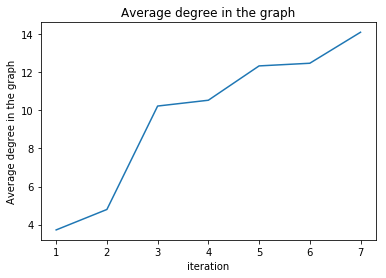

In [12]:
plt.plot(np.linspace(1,len(deg_seq),len(deg_seq)),deg_seq)
plt.title("Average degree in the graph")
plt.xlabel("iteration")
plt.ylabel("Average degree in the graph")

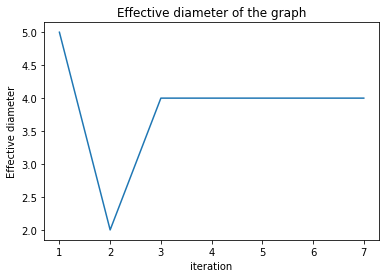

In [14]:
effec = np.array(eff_diam)
plt.plot(np.linspace(1,len(effec),len(effec)),effec)
plt.title("Effective diameter of the graph")
plt.xlabel("iteration")
plt.ylabel("Effective diameter");

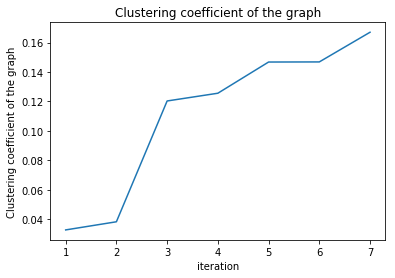

In [16]:
cc_g = np.array(cc)
plt.plot(np.linspace(1,len(cc_g),len(cc_g)),cc_g)
plt.title("Clustering coefficient of the graph")
plt.xlabel("iteration")
plt.ylabel("Clustering coefficient of the graph");

Text(0,0.5,'Average shortest path length')

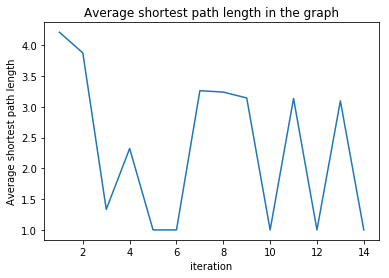

In [17]:
avp = np.array(av_path)
plt.plot(np.linspace(1,len(avp),len(avp)),avp)
plt.title("Average shortest path length in the graph")
plt.xlabel("iteration")
plt.ylabel("Average shortest path length")